In [ ]:
# Based on Golam Saroar' tutorial : https://github.com/golamSaroar
# Modified by Mehdi Ammi, Univ. Paris 8

# Basics of Neural Networks

## Introduction

When starting with any new concept or technology, it's best to begin with something simple that illustrates the fundamental structure of how things work. In the case of neural networks, a classic example is learning the relationship between two numbers.

### Example Function

For instance, consider the following function, which you might already know how to write:

In [ ]:
float hw_function(float x) {
    float y = (2 * x) - 1;
    return y;
}

Now, the goal is to train a neural network to learn this relationship using data.

### Paradigm Shift

Training a neural network involves a different paradigm compared to traditional programming. Instead of explicitly defining the relationship, you provide the network with data (input-output pairs) and let it figure out the relationship.

## Step-by-Step Explanation

## Step 1: Imports

First, we need to import the necessary libraries. TensorFlow is a popular framework for building and training neural networks, and we will use tf as an alias for it. We also need numpy for handling data as arrays, and keras (a high-level API within TensorFlow) for building the neural network model.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

## Step 2: Define the Neural Network

Next, we create the simplest possible neural network. This network has one layer with one neuron, and it expects input in the form of a single value.

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Here, 'tf.keras.Sequential' indicates that our model consists of a sequence of layers. 
'keras.layers.Dense' is a densely connected layer where each neuron receives input from all neurons of the previous layer. 
'units=1' means we have one neuron, and 'input_shape=[1]' specifies that the input is a single value.

## Step 3: Compile the Neural Network

To prepare the model for training, we need to compile it. This involves specifying a loss function and an optimizer. The loss function measures how well the model's predictions match the actual data, while the optimizer adjusts the model's parameters to minimize the loss.

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

Here, 'sgd' stands for Stochastic Gradient Descent, a common optimization algorithm. 
'mean_squared_error' is a loss function that calculates the average squared difference between the predicted and actual values.

## Step 4: Provide the Data

We now need to provide data for training. We'll use six pairs of x and y values that follow our defined relationship 'y = 2x - 1'.

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

Here, 'xs' contains the input values, and 'ys' contains the corresponding output values. 
We use numpy arrays for efficient computation.

## Step 5: Train the Neural Network

Training the neural network involves running the model on the provided data for a specified number of iterations (epochs). During each epoch, the model makes a prediction, calculates the loss, and adjusts the weights using the optimizer.

In [ ]:
model.fit(xs, ys, epochs=500)

In [ ]:
>>Epoch 1/500
1/1 [==============================] - 1s 518ms/step - loss: 3.1363
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 2.6248
Epoch 3/500
1/1 [==============================] - 0s 25ms/step - loss: 2.2191
Epoch 4/500
......
......
......
Epoch 498/500
1/1 [==============================] - 0s 12ms/step - loss: 2.7040e-05
Epoch 499/500
1/1 [==============================] - 0s 11ms/step - loss: 2.6485e-05
Epoch 500/500
1/1 [==============================] - 0s 10ms/step - loss: 2.5941e-05
<keras.src.callbacks.History at 0x7eb67d437400>

This code trains the model on the xs and ys data for 500 epochs. 
The model.fit function executes the training loop, where it repeatedly makes predictions, computes the loss, and updates the model's parameters.

## Step 6: Make Predictions

After training, the model can make predictions for new input values. For example, we can predict the output for x = 10.

In [ ]:
print(model.predict([10.0]))

>> 1/1 [==============================] - 0s 92ms/step
[[18.98514]]

You might have thought 19, right? But it ended up being a little under. Why do you think that is?

## Understanding the Results

The neural network attempts to find the best relationship between x and y based on the training data. With only six data points, the model learns an approximation of the relationship. As a result, the prediction for x = 10 might be close to 19 but not exactly 19. This behavior is typical in neural networks, which often deal with probabilities rather than certainties.

## Recap

1. Imports: Import TensorFlow, numpy, and keras.
2. Define the Neural Network: Create a simple neural network with one layer and one neuron.
3. Compile the Neural Network: Specify the loss function and optimizer.
4. Provide the Data: Supply input-output pairs for training.
5. Train the Neural Network: Run the training process for a specified number of epochs.
6. Make Predictions: Use the trained model to predict outputs for new inputs.

By following these steps, you can build and train a basic neural network to learn simple relationships between numbers. As you progress, you will encounter more complex scenarios and models, but the fundamental concepts remain the same.

## Data Visualization

To visualize the input data xs and ys, you can use the matplotlib library in Python. 
Here’s a simple script to plot these data points:

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, color='blue', label='Input Data')

# Adding titles and labels
plt.title('Input Data Visualization')
plt.xlabel('xs (Input Values)')
plt.ylabel('ys (Output Values)')

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

# Show the plot
plt.show()

To visualize both the input data and the predictions on the same graph, you can modify the previous code to include the predictions in red. 

Here’s how you can do it:

1. Train the neural network to get the predictions.
2. Plot both the input data and the predictions.

Here's the complete code:

In [ ]:
import matplotlib.pyplot as plt

# Train the neural network
model.fit(xs, ys, epochs=500)

# Make predictions
predictions = model.predict(xs)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, color='blue', label='Input Data')
plt.plot(xs, predictions, color='red', label='Predictions')

# Adding titles and labels
plt.title('Input Data and Predictions Visualization')
plt.xlabel('xs (Input Values)')
plt.ylabel('ys (Output Values)')

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

# Show the plot
plt.show()

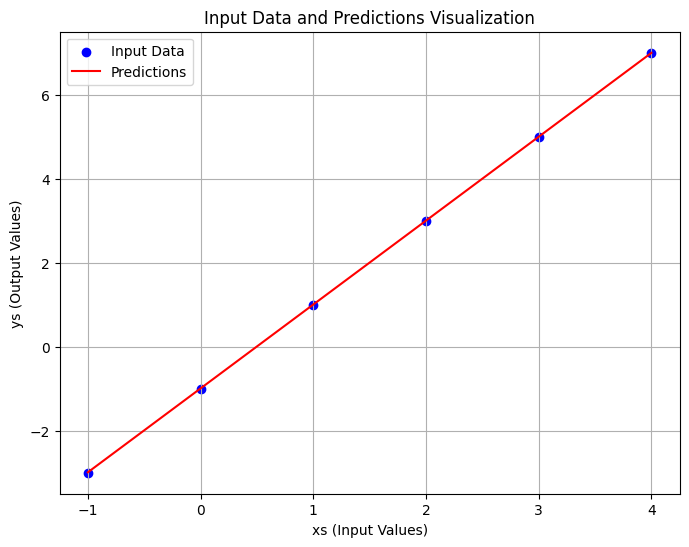

## Projectile motion

Now, now we will model more complex data with a non-linear behavior : 

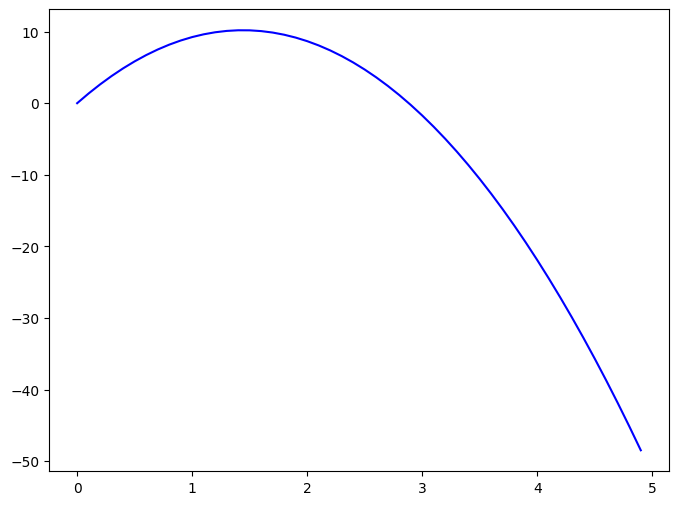

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the projectile
v0 = 20  # initial velocity (m/s)
theta = 45  # launch angle (degrees)
g = 9.81  # gravity (m/s^2)

# Convert the angle to radians
theta_rad = np.radians(theta)

# Generate time points (0 to 5 seconds, every 0.1 second)
xs = np.arange(0, 5, 0.1)

# Calculate the height at each time point
ys = v0 * xs * np.sin(theta_rad) - 0.5 * g * xs**2

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(xs, ys, color='blue')

# Remove the axes
plt.axis('off')

# Show the plot
plt.show()

Here, we use the same NN model without modification

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Define the neural network (same as before)
model = tf.keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')

# Parameters for the projectile
v0 = 20  # initial velocity (m/s)
theta = 45  # launch angle (degrees)
g = 9.81  # gravity (m/s^2)

# Convert the angle to radians
theta_rad = np.radians(theta)

# Generate time points (0 to 5 seconds, every 0.1 second)
xs = np.arange(0, 5, 0.1)

# Calculate the height at each time point
ys = v0 * xs * np.sin(theta_rad) - 0.5 * g * xs**2

# Train the neural network
model.fit(xs, ys, epochs=500)

# Make predictions
predictions = model.predict(xs)

# Plot the data and predictions
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, color='blue', label='Input Data')
plt.plot(xs, predictions, color='red', label='Predictions')

# Remove the axes
plt.axis('off')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


Result: The prediction does not follow the nonlinear trajectory.

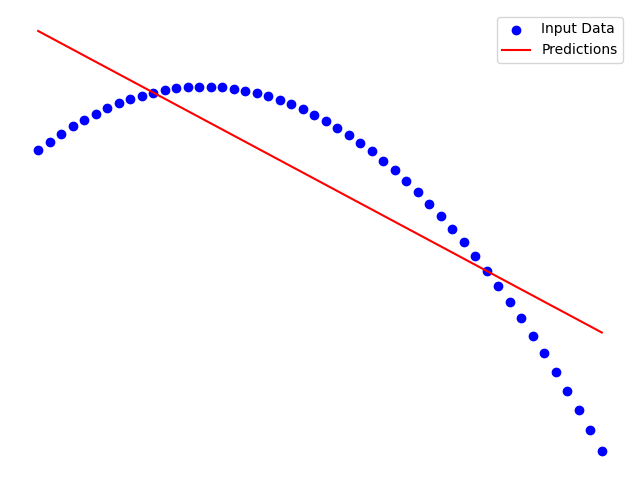

## Neural Network modification  

Try the following configurations of network with two hidden layers with 5/10/64 neurons each, using the ReLU activation function, 

In [ ]:
## 2 hidden layer, 5 neurons each
model = tf.keras.Sequential([
    keras.layers.Dense(units=10, activation='relu', input_shape=[1]),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=1)
])

In [ ]:
## 2 hidden layer, 10 neurons each
model = tf.keras.Sequential([
    keras.layers.Dense(units=10, activation='relu', input_shape=[1]),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=1)
])

In [ ]:
## 2 hidden layer, 64 neurons each
model = tf.keras.Sequential([
    keras.layers.Dense(units=10, activation='relu', input_shape=[1]),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=1)
])

Result: the prediction follows better the trajectory !

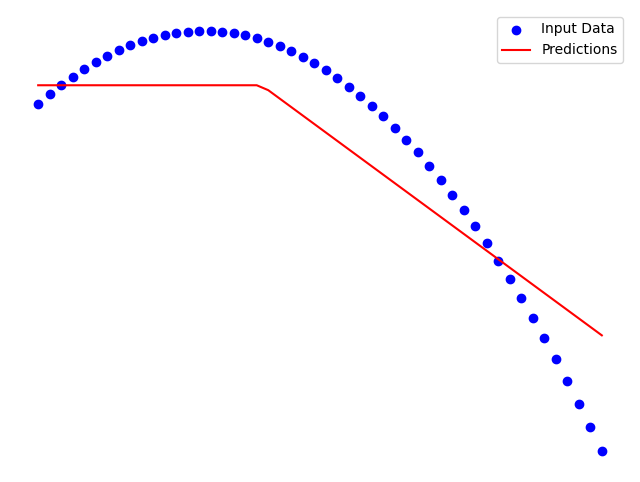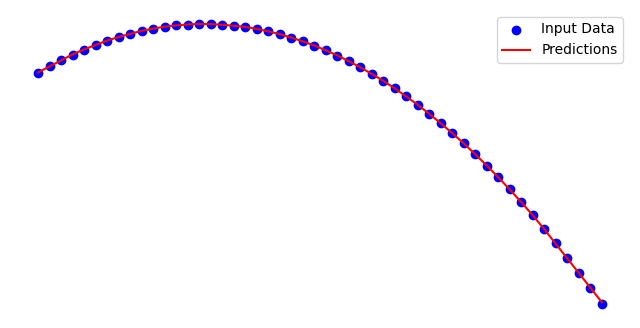

# Exercices

## Change the Initial Parameters

 - Set v0 to 30 m/s and theta to 80 degrees.
 - Train the neural network and plot the new trajectory.
 - Compare the results with the original parameters.

## Add Noise to the Data

 - Add random noise to ys using np.random.normal(0, 1, size=ys.shape).
 - Train the neural network with the noisy data.
 - Plot and compare the predictions with and without noise.

In [ ]:
# Add random noise to the height data

ys_noisy = ys + np.random.normal(0, 1, size=ys.shape)


# Train the neural network with noisy data
model.fit(xs, ys_noisy, epochs=2000, verbose=0)

...

# Plot the noisy data with predictions
plt.scatter(xs, ys_noisy, color='blue', label='Noisy Input Data')

## Use Different Activation Functions

 - Change the activation functions in the hidden layers from relu to tanh.
 - Train the neural network and plot the trajectory.
 - Compare the results with the relu activation function.

'relu' -> 'tanh'

## Adjust the Neural Network Architecture

 - Add a third hidden layer with 32 neurons.
 - Train the neural network and plot the trajectory.
 - Compare the results with the original architecture.

In [ ]:
# Define the neural network with three hidden layers
model = tf.keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=[1]),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1)
])

## Use a Different Optimizer

 - Change the optimizer from adam to sgd (Stochastic Gradient Descent).
 - Train the neural network and plot the trajectory.
 - Compare the results with the adam optimizer.

In [ ]:
'adam' -> 'sgd'

## Predict Future Points

 - Extend the time points xs to 7 seconds.
 - Use the trained neural network to predict heights for the extended time range.
 - Plot and compare the predictions with the expected parabolic trajectory.

In [ ]:
# Extend the time points to 7 seconds
xs_extended = np.arange(0, 7, 0.1)

# Make predictions for the extended time range
predictions_extended = model.predict(xs_extended)

# Calculate the expected heights for the extended range
ys_extended = v0 * xs_extended * np.sin(theta_rad) - 0.5 * g * xs_extended**2

# Plot the data and predictions
plt.figure(figsize=(8, 6))
plt.scatter(xs_extended, ys_extended, color='blue', label='Expected Data')
plt.plot(xs_extended, predictions_extended, color='red', label='Predictions')

## Evaluate Model Performance

 - Calculate the Mean Squared Error (MSE) between the predicted and actual heights.
 - Print the MSE value and discuss its significance.
 - Experiment with different neural network architectures to minimize the MSE.

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ys, predictions)
print(f"Mean Squared Error: {mse}")

## Visualize Training Loss

 - Modify the code to store the training loss at each epoch.
 - Plot the training loss against epochs.
 - Discuss the training process and how the loss changes over time.

In [ ]:
# Train the neural network and store the training loss
history = model.fit(xs, ys, epochs=2000, verbose=0)

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Exercice 

In this exercise, you will build a simple neural network to predict the price of a house based on the number of bedrooms it has. The relationship between the number of bedrooms and the price is given by a straightforward formula:

Price = 50k + (50k x number of bedrooms)

For example:
- A house with 1 bedroom costs \( 100k \)
- A house with 2 bedrooms costs \( 150k \)
- A house with 3 bedrooms costs \( 200k \)
- And so on...

The task is to create a neural network that learns this relationship and can predict the price of a house with 7 bedrooms.

### Steps and Explanation

1. **Import Necessary Libraries**:

   These imports bring in TensorFlow for building the neural network, NumPy for handling the data, and Matplotlib for plotting the results.

2. **Define the Neural Network**:

   Create a simple neural network with one layer containing one neuron. The input to the network will be a single value (number of bedrooms).

3. **Compile the Model**:

   Compile the model with the Stochastic Gradient Descent (SGD) optimizer and Mean Squared Error (MSE) as the loss function. This setup is suitable for regression problems.

4. **Prepare the Training Data**:

   Define `xs` to represent the number of bedrooms and `ys` to represent the scaled prices of the houses. Instead of using prices like 100k, 150k, etc., use scaled values like 1.0, 1.5, 2.0, etc., to make the training process more efficient. This scaling down helps to manage large values and often results in better training performance.

5. **Train the Model**:

   Train the model on the data for 1000 epochs. Each epoch represents one complete pass through the entire training dataset.

6. **Make Predictions**:

   Use the model to predict the scaled price for a house with 7 bedrooms. Since the prices were scaled down by a factor of 100, the prediction will be in the same scale and should be close to 4 (which corresponds to 400k when scaled back up).

7. **Visualize the Results**:

   To visualize the input data, actual outputs, and the predictions, add code to plot these values using Matplotlib.


# Deliverables

Submit the modified code for each exercise.

Provide a brief report on the impact of each modification on model performance. Include accuracy, loss, and any other relevant metrics.